In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
nt = 50000
dt = 0.1
Nu = 1.2e-1      # Holton pp 58
Ns = Nu/10.

In [3]:
def sens_subplots(var, ax, title):
    cs = ax.plot(var)
    ax.set_title(title)

### NLM

In [5]:
w = np.zeros(nt)
bu = np.zeros(nt)
bs = np.zeros(nt)

w[0] = 0.1
bu[0] = 0
bs[0] = 0
for t in range(nt-1):
    if bs[t] > bu[t]:
        w[t+1] = w[t] + bs[t]*dt
    else:
        w[t+1] = w[t] + bu[t]*dt
    
    bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
    bs[t+1] = bs[t] - (Ns**2)*w[t]*dt

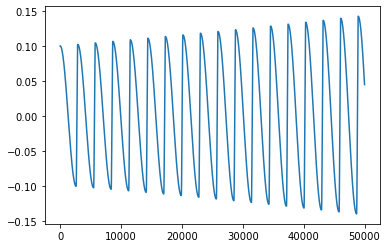

In [6]:
plt.plot(w)

### TLM

In [7]:
nt = 50000
# basic state?
w = np.zeros(nt)
bu = np.zeros(nt)
bs = np.zeros(nt)

# p for prime, perturbation
wp = np.zeros(nt)
bup = np.zeros(nt)
bsp = np.zeros(nt)

# initial condition for basic state
w[0] = 0.1
bu[0] = 0
bs[0] = 0

# initial condition for perturbaitons are all zeros, 
wp[0] = 1e-4
bup[0] = 1e-5
bsp[0] = 1e-6
# no need to specify
for t in range(nt-1):
    if bs[t] > bu[t]:
        wp[t+1] = wp[t] + dt*bup[t]
        w[t+1] = w[t] + bs[t]*dt   
    else:
        wp[t+1] = wp[t] + dt*bsp[t]
        w[t+1] = w[t] + bu[t]*dt
    
    bup[t+1] = bup[t] - (Nu**2)*wp[t]*dt
    bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
    bsp[t+1] = bsp[t] - (Ns**2)*wp[t]*dt
    bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
tlm_pert = [wp, bup, bsp]

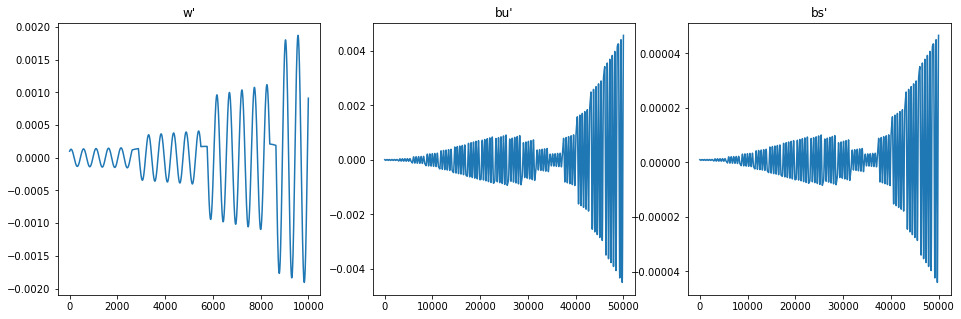

In [8]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,5))
sens_subplots(wp[:10000], ax[0], "w'")
sens_subplots(bup, ax[1], "bu'")
sens_subplots(bsp, ax[2], "bs'")

NameError: name 'a_w' is not defined

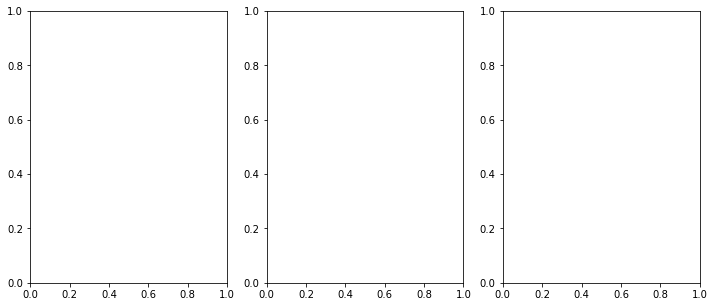

In [9]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,5))
sens_subplots(a_w, ax[0], 'sensitivity to w')
sens_subplots(a_bu, ax[1], 'sensitivity to bu')
sens_subplots(a_bs, ax[2], 'sensitivity to bs')

#### Add in perturbations to NLM

In [11]:
wpp = 1e-4
bupp = 1e-5
bspp = 1e-6

w[0] = 0.1+wpp
bu[0] = 0+bupp
bs[0] = 0+bspp
for t in range(nt-1):
    if bs[t] > bu[t]:
        w[t+1] = w[t] + bs[t]*dt
    else:
        w[t+1] = w[t] + bu[t]*dt
    
    bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
    bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
nlm_pert = np.array([w,bu,bs])

w[0] = 0.1
bu[0] = 0
bs[0] = 0
for t in range(nt-1):
    if bs[t] > bu[t]:
        w[t+1] = w[t] + bs[t]*dt
    else:
        w[t+1] = w[t] + bu[t]*dt
    
    bu[t+1] = bu[t] - (Nu**2)*w[t]*dt
    bs[t+1] = bs[t] - (Ns**2)*w[t]*dt
nlm_ctrl = np.array([w,bu,bs])

In [1]:
nlm_diff = nlm_pert - nlm_ctrl
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,5))
sens_subplots(nlm_diff[0], ax[0], "Euler NLM w'")
sens_subplots(nlm_diff[1], ax[1], "NLM bu'")
sens_subplots(nlm_diff[2], ax[2], "NLM bs'")

NameError: name 'nlm_pert' is not defined

In [ ]:
def sens_subplots(var, ax, title):
    cs = ax.plot(var)
    ax.set_title(title)

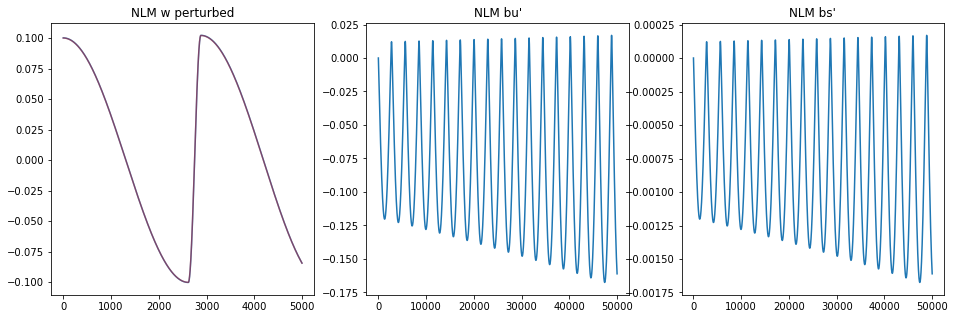

In [46]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,5))
sens_subplots(nlm_pert[0][:5000], ax[0], "NLM w perturbed")
ax[0].plot(nlm_ctrl[0][:5000], color='r', alpha=0.4)
sens_subplots(nlm_pert[1], ax[1], "NLM bu'")
sens_subplots(nlm_pert[2], ax[2], "NLM bs'")

In [22]:
a = pd.read_csv('/home1/class/fall17/nchen67/fortran_c/fort.16', delim_whitespace=True, 
                header=None, names=['a_w', 'a_bu', 'a_bs'])
a_w = a.a_w.values[::-1]
a_bu = a.a_bu.values[::-1]
a_bs = a.a_bs.values[::-1]

In [25]:
a_w[-1], a_w[0], bs[0], bu[0]

(1.0, 0.447927058, 0.0, 0.0)

dR final = (-0.0021136518504991366, 0.0, 0.0)


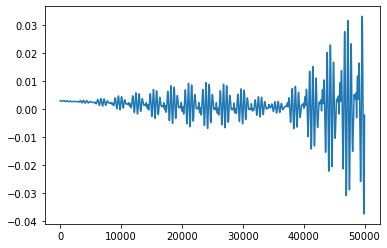

In [26]:
dR = tlm_pert[0]*a_w + tlm_pert[1]*a_bu + tlm_pert[2]*a_bs
plt.plot(dR)
print(f'dR final = {tlm_pert[0][-1]*a_w[-1], tlm_pert[1][-1]*a_bu[-1], tlm_pert[2][-1]*a_bs[-1]}')

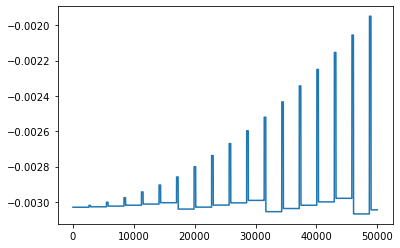

In [27]:
nlm_diff = nlm_ctrl - nlm_pert
dR = nlm_diff[0]*a_w + nlm_diff[1]*a_bu + nlm_diff[2]*a_bs
plt.plot(dR)

$<Lx'\cdot Lx'> = <L^T(Lx')\cdot x'>$

In [28]:
wt = tlm_pert[0][-1]
but = tlm_pert[1][-1]
bst = tlm_pert[2][-1]
wt, but, bst

(-0.0021136518504991366, 0.004576240138814008, 4.666240138814002e-05)

## filepath

In [4]:
path = '/Users/nuochen/moist-sys/fortran_moist_lf_asselin/'

In [14]:
a = pd.read_csv(path+'fort.15', delim_whitespace=True, 
                header=None, names=['a_w', 'a_bu', 'a_bs'])
a_w = a.a_w.values[::-1]
a_bu = a.a_bu.values[::-1]
a_bs = a.a_bs.values[::-1]

In [6]:
#a_w[0]*wp[0] + a_bu[0]*bup[0] + a_bs[0]*bsp[0], wt**2 + but**2 + bst**2
#wp[0]= 1e-4  bup[0] = 1e-5 bsp[0] = 1e-6
wp[-1]*wp[-1], a_w[0]*wp[0]

NameError: name 'wp' is not defined

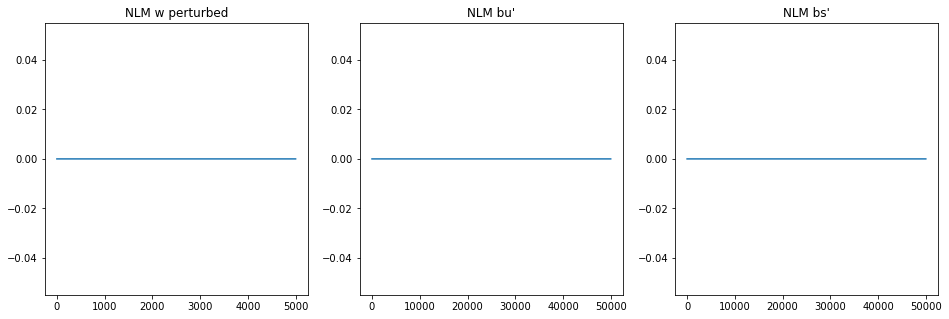

In [15]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,5))
sens_subplots(a_w[:5000], ax[0], "NLM w perturbed")
# ax[0].plot(nlm_ctrl[0][:5000], color='r', alpha=0.4)
sens_subplots(a_bu, ax[1], "NLM bu'")
sens_subplots(a_bs, ax[2], "NLM bs'")

### ADJ

def pushcontrol1b(cc):
    pushbit(cc!=0)

def popcontrol1b(cc):
    # boolean: popbit
    print(pop_bit())
    if pop_bit():
        cc = 1
    else:
        cc = 0
    return cc

def pushbit(bit):
    global adbitbuf, adbitibuf
    if bit:
        adbitbuf = set_bit(adbitbuf, adbitibuf)
    else:
        adbitbuf = clear_bit(adbitbuf, adbitibuf)
    
    adbitibuf +=1 
    return bit
    # boolean: bit

def pop_bit():
    global adbitbuf, adbitibuf
    adbitibuf -= 1
    popbit = btest(adbitbuf, adbitibuf)
    return popbit

def btest(i, pos):
    'https://stackoverflow.com/questions/15876136/btest-function-in-fortran-is-there-any-equivalent-in-python'
    return bool(i & (1 << pos))

def set_bit(value, bit):
    '''
    Elemental Intrinsic Function (Generic): Sets one bit to 1.
    These work for integers of any size, even greater than 32 bit:
    https://stackoverflow.com/questions/12173774/how-to-modify-bits-in-an-integer
    '''
    return value | (1<<bit)

def clear_bit(value, bit):
    '''
    Elemental Intrinsic Function (Generic): Clears one bit to zero.
    '''
    return value & ~(1<<bit)
